In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
filename = '/content/drive/MyDrive/PTDataScience/Proyecto1/sales_predictions.csv'
sales_df = pd.read_csv(filename)

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
sales_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [15]:
sales_df.loc[sales_df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [16]:
sales_df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDO19     9
NCL31     9
NCQ06     9
         ..
FDC23     1
FDK57     1
FDN52     1
FDO33     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Podemos ver que se repiten ciertas categorias, por lo que podemos reemplazarlas.

In [18]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('LF','Low Fat')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('reg','Regular')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('low fat','Low Fat')

sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
# Para tratar mejor los datos, cambiaremos el tipo de la columna

sales_df['Item_Identifier'] = sales_df['Item_Identifier'].astype('category')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].astype('category')
sales_df['Item_Type'] = sales_df['Item_Type'].astype('category')
sales_df['Outlet_Identifier'] = sales_df['Outlet_Identifier'].astype('category')
sales_df['Outlet_Establishment_Year'] = sales_df['Outlet_Establishment_Year'].astype('int64')

sales_df['Outlet_Type'] = sales_df['Outlet_Type'].astype('category')
sales_df['Outlet_Location_Type'] = sales_df['Outlet_Location_Type'].astype('category')
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].astype('category')

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 453.4 KB


In [20]:
# Generaremos algunas visualizaciones para poder entender mejor los datos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


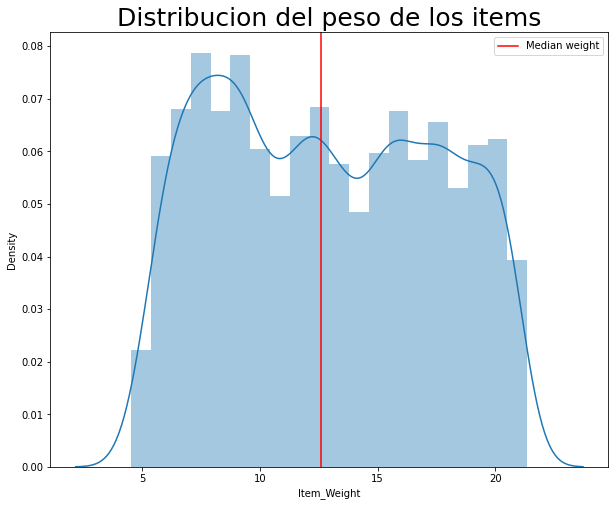

In [22]:
plt.figure(figsize=(10,8))

sns.distplot(sales_df['Item_Weight'].dropna())

plt.title('Distribucion del peso de los items',size=25)
plt.axvline(sales_df['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

In [37]:
sales_df['Count']=1
df_type = sales_df.groupby('Item_Type')['Count'].sum().reset_index()

px.sunburst(sales_df, names='Item_Type', color_continuous_scale='RdBu')

px.pie(df_type,values='Count',names='Item_Type').update_traces(textfont_size=15,textinfo='percent')

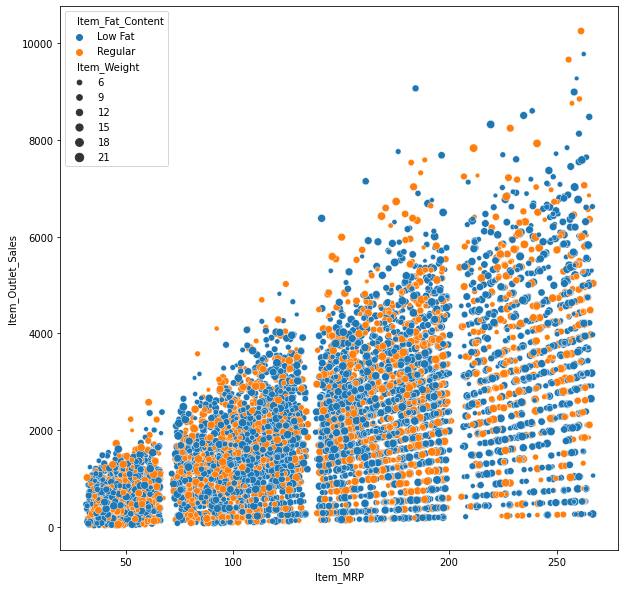

In [41]:
fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=sales_df)